<a href="https://colab.research.google.com/github/superbunny38/MachineLearning/blob/main/2022AndrewLectureNotes/Probset3/Prob1/Set3Problem1(b)(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir output

*Rights*

Assignment made by Stanford Univ. <br>
Assignment solved by Chaeeun Ryu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Make sample dataset..

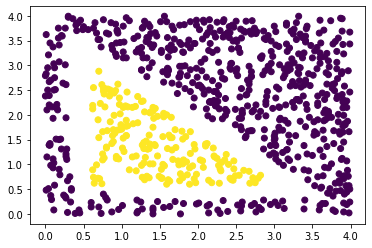

In [53]:
import random
x1_ = list(np.arange(0.,4.,0.01))
x2_ = list(np.arange(0.,4.,0.01))

x1 = []
x2 = []

for _ in range(1000):
  x1 += random.sample(x1_,1)
  x2 += random.sample(x2_,1)
real_x1 = []
real_x2 = []
y = []
for tmp1, tmp2 in zip(x1,x2):
  if tmp1 + tmp2 >= 1.2 and tmp1 + tmp2 <= 3.6:
    if tmp1 >= 0.6 and tmp2 >= 0.6:
      real_x1.append(tmp1)
      real_x2.append(tmp2)
      y.append(1)
      continue
    if tmp1 <= 0.6 and tmp1>=0.3:
      continue
    if tmp2 <= 0.6 and tmp2>=0.3:
      continue
  diff = abs((-tmp1+3.8)-tmp2)
  if  tmp1 >= 0.3 and diff <=0.3 and diff >= 0 and tmp2 >= 0.3:
    continue
  if 0.4<= tmp1 and tmp1 <= 0.7 and 0.3 <= tmp2 and tmp2 <= 0.7:
    continue
  real_x1.append(tmp1)
  real_x2.append(tmp2)
  y.append(0)

sample_data = pd.DataFrame({'x1':real_x1, 'x2':real_x2, 'y':y})
plt.scatter(real_x1,real_x2,c = y)

In [50]:
sample_data.head()

,x1,x2,y
0,0.29,2.04,1
1,2.66,1.91,1
2,1.72,1.04,0
3,3.38,3.18,1
4,0.74,3.93,1


In [51]:
sample_data.to_csv('finally_made.csv')

## (b)
Use the step function defined as:

\begin{equation}
  f(x) =
    \begin{cases}
      1 & \text{$x$ >= 0}\\
      0 & \text{$x$ < 0}
    \end{cases}       
\end{equation}

Is it possible to have a set of weights that allow the neural network to classify this dataset with 100% accuracy?

**Answer:** <br>
It is possible to get 100% accuracy because, the label is

1(inner triangle) if meets at least one of the condition:
- $-1*x1 -1*x2 + 3.6 >= 0$
- $x1-0.5 >=0$
- $x2-0.5 >=0$

==============step function==============
1: 184 , 0: 627
acc: 100.0%


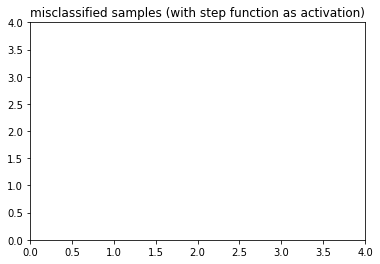

In [75]:
import json

def example_weights():
    """This is an example function that returns weights.
    Use this function as a template for optimal_step_weights and optimal_sigmoid_weights.
    You do not need to modify this class for this assignment.
    """
    w = {}
    #a1
    w['hidden_layer_0_1'] = -0.5#bias
    w['hidden_layer_1_1'] = 0#from x1
    w['hidden_layer_2_1'] = 1#from x2
    #a2
    #삼각형 대각 위
    w['hidden_layer_0_2'] = 3.6#bias
    w['hidden_layer_1_2'] = -1#from x1
    w['hidden_layer_2_2'] = -1#from x2
    #a3
    w['hidden_layer_0_3'] = -0.5#bias
    w['hidden_layer_1_3'] = 1#from x1
    w['hidden_layer_2_3'] = 0#from x2
    #o
    w['output_layer_0'] = -2.5#bias
    w['output_layer_1'] = 1#from a1
    w['output_layer_2'] = 1#from a2
    w['output_layer_3'] = 1#from a3


    return w

def step_function(x):
  if x>=0:
    return 1
  else:
    return 0

def optimal_step_weights(data = sample_data):
    """Return the optimal weights for the neural network with a step activation function.
    
    This function will not be graded if there are no optimal weights.
    See the PDF for instructions on what each weight represents.
    
    The hidden layer weights are notated by [1] on the problem set and 
    the output layer weights are notated by [2].

    This function should return a dict with elements for each weight, see example_weights above.

    """
    w = example_weights()

    # *** START CODE HERE ***
    #forward
    pred = []
    idx = 0
    y = data['y']
    for x1, x2 in zip(data['x1'],data['x2']):
      #forward
      z1 = w['hidden_layer_0_1'] + x1*w['hidden_layer_1_1'] + x2*w['hidden_layer_2_1']
      a1 = step_function(z1)
      z2 = w['hidden_layer_0_2'] + x1*w['hidden_layer_1_2'] + x2*w['hidden_layer_2_2']
      a2 = step_function(z2)
      z3 = w['hidden_layer_0_3'] + x1*w['hidden_layer_1_3'] + x2*w['hidden_layer_2_3']
      a3 = step_function(z3) 
      z_o = w['output_layer_0'] + a1*w['output_layer_1'] + a2*w['output_layer_2'] + a3*w['output_layer_3']
      o = step_function(z_o) 
      pred.append(o)
      idx +=1
    # *** END CODE HERE ***

    return w,pred



def accuracy(pred,sample_data = sample_data):
  y = sample_data['y']
  assert len(pred) == len(y)
  n = len(pred)
  misclassified_x1 = []
  misclassified_x2 = []
  count,idx = 0,0
  for p, y_ in zip(pred,y):
    if p == y_:
      count +=1
    else:
      misclassified_x1.append(list(sample_data['x1'])[idx])
      misclassified_x2.append(list(sample_data['x2'])[idx])
    idx +=1
  return count/n, misclassified_x1, misclassified_x2

if __name__ == "__main__":
    print("==============step function==============")
    step_weights, pred_step = optimal_step_weights(sample_data)
    print('1:',pred_step.count(1), ', 0:',pred_step.count(0))
    acc, mis_x1, mis_x2 = accuracy(pred_step)
    print(f"acc: {acc*100}%")
    plt.title("misclassified samples (with step function as activation)")
    plt.scatter(mis_x1, mis_x2)
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()
    with open('output/step_weights', 'w') as f:
        json.dump(step_weights, f)

# (c)
Let the activation function be the linear function $f(x) = x$ and the activation function for $o$ to be the same step function as before.
Is it possible to have a set of weights that allow the neural network to classify this dataset with 100% accuracy?

1(inner triangle) if meets at least one of the condition:
- $-1*x1 -1*x2 + 3.6 >= 0$
- $x1-0.5 >=0$
- $x2-0.5 >=0$

0(inner triangle) if meets all three condition:
- $-1*x1 -1*x2 + 3.6 < 0$
- $x1-0.5 < 0$
- $x2-0.5 < 0$

**A.**<br>
It is impossible.It is because the data is non-linearly separable, and having activation functions as linear functions just makes it useless to apply activation functions, as the dot product is linear already and we can't express anything non-linear.

predicted || 1: 707 , 0: 104
acc: 27.62022194821208%


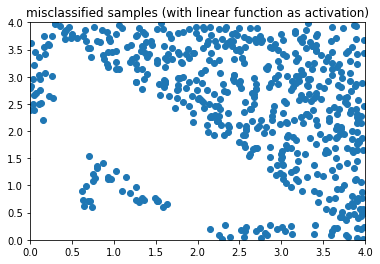

In [119]:
def example_weights():
    """This is an example function that returns weights.
    Use this function as a template for optimal_step_weights and optimal_sigmoid_weights.
    You do not need to modify this class for this assignment.
    """
    w = {}
    #a1
    w['hidden_layer_0_1'] = -0.5#bias
    w['hidden_layer_1_1'] = 1#from x1
    w['hidden_layer_2_1'] = 0#from x2
    #a2
    #삼각형 대각 위
    w['hidden_layer_0_2'] = -0.5#bias
    w['hidden_layer_1_2'] = 0#from x1
    w['hidden_layer_2_2'] = 1#from x2
    #a3
    w['hidden_layer_0_3'] = -3.6#bias
    w['hidden_layer_1_3'] = 1#from x1
    w['hidden_layer_2_3'] = 1#from x2
    #o
    w['output_layer_0'] = 0#bias
    w['output_layer_1'] = 1#from a1
    w['output_layer_2'] = 1#from a2
    w['output_layer_3'] = 1#from a3


    return w

def linear_function(x):
  return x

def optimal_linear_weights(data = sample_data):
    """Return the optimal weights for the neural network with a linear activation function for the hidden units.
    
    This function will not be graded if there are no optimal weights.
    See the PDF for instructions on what each weight represents.
    
    The hidden layer weights are notated by [1] on the problem set and 
    the output layer weights are notated by [2].

    This function should return a dict with elements for each weight, see example_weights above.

    """
    w = example_weights()
    
    # *** START CODE HERE ***
    pred = []
    idx = 0
    y = data['y']
    for x1, x2 in zip(data['x1'],data['x2']):
      #forward
      z1 = w['hidden_layer_0_1'] + x1*w['hidden_layer_1_1'] + x2*w['hidden_layer_2_1']
      a1 = linear_function(z1)
      z2 = w['hidden_layer_0_2'] + x1*w['hidden_layer_1_2'] + x2*w['hidden_layer_2_2']
      a2 = linear_function(z2)
      z3 = w['hidden_layer_0_3'] + x1*w['hidden_layer_1_3'] + x2*w['hidden_layer_2_3']
      a3 = linear_function(z3) 
      z_o = w['output_layer_0'] + a1*w['output_layer_1'] + a2*w['output_layer_2'] + a3*w['output_layer_3']
      o = step_function(z_o) 
      pred.append(o)
      idx +=1
    # *** END CODE HERE ***

    return w, pred

if __name__ == "__main__":
    linear_weights, pred_linear = optimal_linear_weights(sample_data)
    print('predicted || 1:',pred_linear.count(1), ', 0:',pred_linear.count(0))
    acc, mis_x1, mis_x2 = accuracy(pred_linear)
    print(f"acc: {acc*100}%")
    plt.title("misclassified samples (with linear function as activation)")
    plt.scatter(mis_x1, mis_x2)
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()

    with open('output/linear_weights', 'w') as f:
        json.dump(linear_weights, f)